In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [4]:
import pandas as pd
a=pd.read_csv("/content/breast_cancer_csv.csv")
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.DataFrame(a)

label_encoders = {}

for column in ['Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status','Patient_Status']:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder


print(df)




     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340             1   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320             1   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815             1   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190             0   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210             1   
..   ...     ...       ...       ...       ...       ...           ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320             1   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870             0   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860             1   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820             1   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050             1   

     Histology  ER status  PR status  HER2 status  \
0            0          0          0            0   
1    

In [6]:
a1=a.dropna()
y=a1["Patient_Status"]
print(y)
x=a1.drop(['Surgery_type','Date_of_Surgery','Date_of_Last_Visit','Gender'],axis=1)

print(x)
print(x.shape)

0      0
1      1
2      0
3      0
4      0
      ..
329    0
330    0
331    1
332    0
333    1
Name: Patient_Status, Length: 317, dtype: int64
     Age  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  Histology  \
0     42  0.952560   2.15000  0.007972 -0.048340             1          0   
1     54  0.000000   1.38020 -0.498030 -0.507320             1          0   
2     63 -0.523030   1.76400 -0.370190  0.010815             1          0   
3     78 -0.876180   0.12943 -0.370380  0.132190             0          0   
4     42  0.226110   1.74910 -0.543970 -0.390210             1          0   
..   ...       ...       ...       ...       ...           ...        ...   
329   59  0.024598   1.40050  0.024751  0.280320             1          0   
330   41  0.100120  -0.46547  0.472370 -0.523870             0          0   
331   54  0.753820   1.64250 -0.332850  0.857860             1          0   
332   74  0.972510   1.42680 -0.366570 -0.107820             1          1   
333   

In [7]:
x1=x.fillna(0)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=20)
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)


     Age  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  Histology  \
122   60  0.211970   1.52740 -0.409490  0.000978             1          1   
276   40  0.087549   2.19570 -0.993560 -0.378070             2          0   
17    63  0.052728   0.72210 -0.308650 -0.531290             2          0   
106   49  0.061643   1.31490 -0.099357  0.754410             1          1   
101   66 -0.370430   1.91850 -0.796080 -0.062903             1          1   
..   ...       ...       ...       ...       ...           ...        ...   
74    69 -0.489030   2.37840 -0.467090  0.097310             0          0   
293   53 -0.361650   2.65660  0.307690  0.203820             1          0   
228   73 -0.218610   0.95399  0.324490 -0.799830             1          0   
236   64 -0.338660  -0.64147  1.657500 -0.420820             2          0   
286   78 -0.169500   1.38790 -1.307100 -1.259700             0          0   

     ER status  PR status  HER2 status  Patient_Status  
122          0    

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_LR)
print("Classification Report:\n",report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        15

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [11]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score





svm_classifier = SVC(kernel='linear')

svm_classifier.fit(x_train, y_train)


y_pred = svm_classifier.predict(x_test)

accuracy_svm1 = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy_svm1}")
print("Classification Report:\n",report)


Accuracy:1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        15

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification


X, y = make_classification(n_classes=2, weights=[0.1, 0.9], n_samples=1000, random_state=42)


smote = SMOTE(sampling_strategy='auto', random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)

In [13]:
print(X.shape)

(1000, 20)


In [14]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(x_train.shape[1])
        self.bias = 0

        for _   in range(self.n_iterations):
            errors = 0
            for i in range(x_train.shape[0]):

                y_pred = np.dot(X[i], self.weights) + self.bias


                if y[i] * y_pred <= 0:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]
                    errors += 1


            if errors == 0:
                break

    def predict(self, X):

        y_pred = np.dot(X, self.weights) + self.bias
        return np.sign(y_pred)

X = np.array(x)
Y = np.array(y)
perceptron = Perceptron(learning_rate=0.1,n_iterations=1000)
perceptron.fit(X, Y)
predictions = perceptron.predict(x_test)
print("Predictions:",predictions)

Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_SVM = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy_SVM}")
print("Classification Report:\n",report)

Accuracy:0.8687150837988827
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        15

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



Accuracy: 0.87


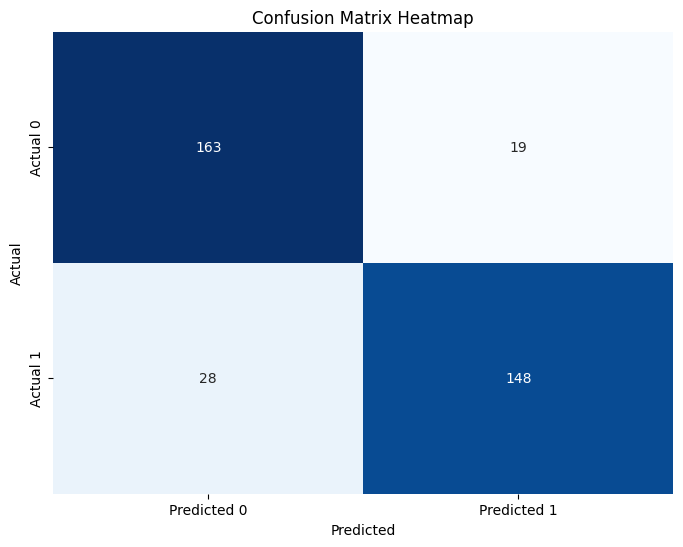

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

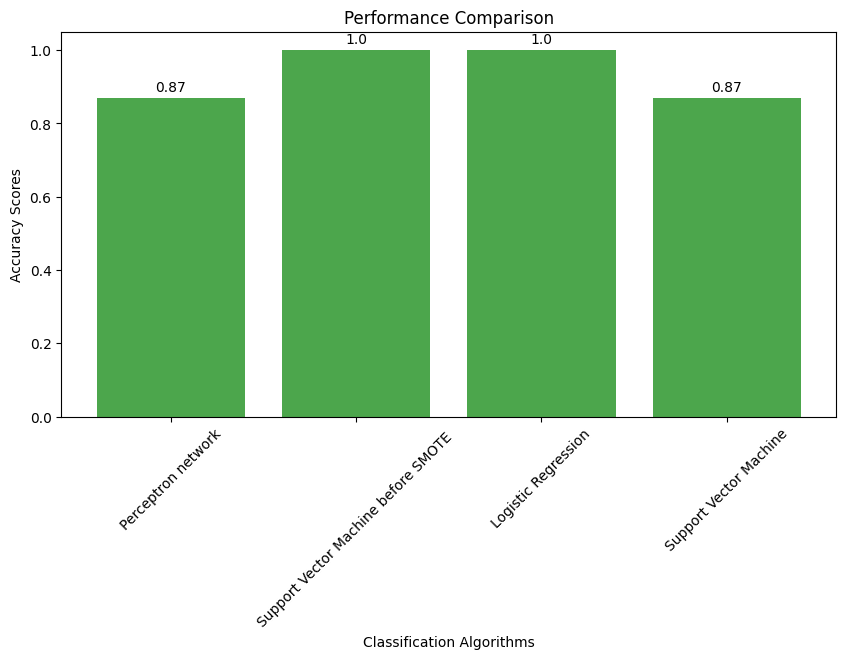

In [17]:
import matplotlib.pyplot as plt

algorithm_names = ['Perceptron network','Support Vector Machine before SMOTE ', 'Logistic Regression', 'Support Vector Machine']
accuracy_scores = [accuracy, accuracy_LR,accuracy_svm1, accuracy_SVM]

plt.figure(figsize=(10, 5))

# Bar chart for accuracy scores
plt.bar(algorithm_names, accuracy_scores, color='Green', alpha=0.7)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')

# Adding data labels
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [21]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Define a function to perform bootstrapping
def bootstrap(X, y, n_samples):
    X_resampled, y_resampled = resample(X, y, n_samples=n_samples, random_state=42)
    return X_resampled, y_resampled

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the number of neighbors for KNN
n_neighbors = 5

# Number of bootstraps
n_bootstraps = 100

# Lists to store accuracy scores from each bootstrap
accuracy_scores = []

for _ in range(n_bootstraps):
    # Perform bootstrapping
    x_train_bootstrap, y_train_bootstrap = bootstrap(X_train, y_train, n_samples=len(X_train))

    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit the KNN model to the bootstrapped data
    knn.fit(x_train_bootstrap, y_train_bootstrap)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy from all bootstraps
average_accuracy_knn = np.mean(accuracy_scores)

print("Average KNN Accuracy:", average_accuracy_knn)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for SVM
accuracy_SVM = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_SVM}")

# You can also generate and print the classification report for SVM
from sklearn.metrics import classification_report
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)


Average KNN Accuracy: 0.8659217877094971
SVM Accuracy: 0.8687150837988827
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       182
           1       0.89      0.84      0.86       176

    accuracy                           0.87       358
   macro avg       0.87      0.87      0.87       358
weighted avg       0.87      0.87      0.87       358



In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define a function to perform bootstrapping
def bootstrap(X, y, n_samples):
    X_resampled, y_resampled = resample(X, y, n_samples=n_samples, random_state=42)
    return X_resampled, y_resampled

# Load your dataset and preprocess as needed
# (the data loading and preprocessing code here)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the number of neighbors for KNN
n_neighbors = 5

# Number of bootstraps
n_bootstraps = 100

# Lists to store accuracy scores from each bootstrap
accuracy_scores_knn = []

for _ in range(n_bootstraps):
    # Perform bootstrapping
    x_train_bootstrap, y_train_bootstrap = bootstrap(X_train, y_train, n_samples=len(X_train))

    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit the KNN model to the bootstrapped data
    knn.fit(x_train_bootstrap, y_train_bootstrap)

    # Make predictions on the test data
    y_pred_knn = knn.predict(X_test)

    # Calculate accuracy and append it to the list
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate the average accuracy from all bootstraps for KNN
average_accuracy_knn = np.mean(accuracy_scores_knn)
print("Average KNN Accuracy:", average_accuracy_knn)

# (the rest of your code for SVM, Perceptron, Logistic Regression, and result plotting)


Average KNN Accuracy: 0.8659217877094971
